Kasus : [Restaurant and Consumer](https://www.kaggle.com/datasets/uciml/restaurant-data-with-consumer-ratings). Sebagai seorang Data Scientist, tentu Anda ingin memanfaatkan data tersebut untuk meningkatkan transaksi di perusahaan. Kembangkan sebuah sistem rekomendasi restoran untuk menjawab permasalahan berikut:

- Berdasarkan data mengenai pengguna, bagaimana membuat sistem rekomendasi yang dipersonalisasi dengan teknik content-based filtering?
- Dengan data rating yang Anda miliki, bagaimana perusahaan dapat merekomendasikan restoran lain yang mungkin disukai dan belum pernah dikunjungi oleh pengguna? 
- Untuk  menjawab pertanyaan tersebut, buatlah sistem rekomendasi dengan tujuan atau goals sebagai berikut:
    - Menghasilkan sejumlah rekomendasi restoran yang dipersonalisasi untuk pengguna dengan teknik content-based filtering.
    - Menghasilkan sejumlah rekomendasi restoran yang sesuai dengan preferensi pengguna dan belum pernah dikunjungi sebelumnya dengan teknik collaborative filtering.

## Dataset

Restaurants
- chefmozaccepts.cs
- chefmozcuisine.csv
- chefmozhours4.csv
- chefmozparking.csv
- geoplaces2.csv

Consumers

- usercuisine.csv
- userpayment.csv
- userprofile.csv

User-Item-Rating
- rating_final.csv

In [1]:
import pandas as pd
 
accepts = pd.read_csv('dataset_latihan/chefmozaccepts.csv')
cuisine = pd.read_csv('dataset_latihan/chefmozcuisine.csv')
hours = pd.read_csv('dataset_latihan/chefmozhours4.csv')
parking = pd.read_csv('dataset_latihan/chefmozparking.csv')
geo = pd.read_csv('dataset_latihan/geoplaces2.csv', encoding = "ISO-8859-1")
usercuisine = pd.read_csv('dataset_latihan/usercuisine.csv')
payment = pd.read_csv('dataset_latihan/userpayment.csv')
profile = pd.read_csv('dataset_latihan/userprofile.csv')
rating = pd.read_csv('dataset_latihan/rating_final.csv')
 
print('Jumlah data pembayaran yang diterima restoran: ', len(accepts.placeID.unique()))
print('Jumlah data masakan pada restoran: ', len(cuisine.placeID.unique()))
print('Jumlah data waktu buka restoran: ', len(hours.placeID.unique()))
print('Jumlah data lokasi restoran: ', len(geo.placeID.unique()))
print('Jumlah data masakan pengguna: ', len(usercuisine.userID.unique()))
print('Jumlah data profil pengguna: ', len(profile.userID.unique()))
print('Jumlah data penilaian yang diberikan pengguna: ', len(rating.userID.unique()))
print('Jumlah data penilaian restoran: ', len(rating.placeID.unique()))

Jumlah data pembayaran yang diterima restoran:  615
Jumlah data masakan pada restoran:  769
Jumlah data waktu buka restoran:  694
Jumlah data lokasi restoran:  130
Jumlah data masakan pengguna:  138
Jumlah data profil pengguna:  138
Jumlah data penilaian yang diberikan pengguna:  138
Jumlah data penilaian restoran:  130


## Univariate Exploratory Data Analysis

- accepts : merupakan jenis pembayaran yang diterima pada restoran tertentu.
- cuisine : merupakan jenis masakan yang disajikan pada restoran.
- hours : merupakan jadwal buka dan tutupnya restoran.
- parking : merupakan ketersediaan tempat parkir pada restoran.
- geo : merupakan letak restoran.
- usercuisine : merupakan jenis masakan dari data pengguna.
- payment : merupakan jenis pembayaran yang dipakai pengguna.
- profile : merupakan data profil pengguna.

Variabel cuisine dan rating akan digunakan pada model rekomendasi kita. Sedangkan, variabel accept dan profile hanya untuk melihat bagaimana profile dan jenis pembayaran yang digunakan oleh pengguna. 


### Accept Variabel (jenis pembayaran yang diterima)

In [2]:
accepts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   placeID   1314 non-null   int64 
 1   Rpayment  1314 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.7+ KB


In [3]:
print('Banyak data: ', len(accepts.placeID.unique()))
print('Jenis Pembayaran yang diterima: ', accepts.Rpayment.unique())

Banyak data:  615
Jenis Pembayaran yang diterima:  ['cash' 'VISA' 'MasterCard-Eurocard' 'American_Express' 'bank_debit_cards'
 'checks' 'Discover' 'Carte_Blanche' 'Diners_Club' 'Visa'
 'Japan_Credit_Bureau' 'gift_certificates']


### Cuisine Variable (Jenis masakan yang tersedia)

In [4]:
cuisine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   placeID   916 non-null    int64 
 1   Rcuisine  916 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.4+ KB


In [5]:
print('Banyak tipe masakan: ', len(cuisine.Rcuisine.unique()))
print('Tipe masakan: ', cuisine.Rcuisine.unique())

Banyak tipe masakan:  59
Tipe masakan:  ['Spanish' 'Italian' 'Latin_American' 'Mexican' 'Fast_Food' 'Burgers'
 'Dessert-Ice_Cream' 'Hot_Dogs' 'Steaks' 'Asian' 'International'
 'Mongolian' 'Vegetarian' 'Brazilian' 'Cafe-Coffee_Shop' 'Cafeteria'
 'Contemporary' 'Deli-Sandwiches' 'Diner' 'Japanese' 'Sushi' 'Seafood'
 'Chinese' 'Bar' 'Bar_Pub_Brewery' 'Pizzeria' 'Mediterranean' 'American'
 'Family' 'Caribbean' 'African' 'Breakfast-Brunch' 'Regional' 'Afghan'
 'Bakery' 'Game' 'Armenian' 'Vietnamese' 'Korean' 'Thai' 'Barbecue'
 'Polish' 'Dutch-Belgian' 'French' 'German' 'Southwestern' 'Persian'
 'Ethiopian' 'Juice' 'Soup' 'Continental-European' 'Greek' 'Southern'
 'Eastern_European' 'California' 'Bagels' 'Turkish' 'Organic-Healthy'
 'Fine_Dining']


### Profile (pengguna)

In [6]:
print(profile.shape)

(138, 19)


In [7]:
profile.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


Pada latihan dengan content-based filtering nanti, data yang dibutuhkan adalah nama restoran dan cuisine. Kita akan menghitung kesamaan (similarity) cuisine dan nama restoran kemudian membuat rekomendasi berdasarkan kesamaan ini. Data-data ini dibutuhkan saat kita membuat sistem rekomendasi dengan teknik lain, misalnya, teknik yang melibatkan demografi.

### Rating

In [8]:
rating.head()
# userId, identitas pengguna 
# placeID, identitas restoran 
# Rating, data rating untuk restoran 
# foor_rating, data rating untuk makanan 
# service_ratiung, data layanan restoran

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [9]:
rating.describe()

,placeID,rating,food_rating,service_rating
count,1161.000000,1161.000000,1161.000000,1161.000000
mean,134192.041344,1.199828,1.215332,1.090439
std,1100.916275,0.773282,0.792294,0.790844
min,132560.000000,0.000000,0.000000,0.000000
25%,132856.000000,1.000000,1.000000,0.000000
50%,135030.000000,1.000000,1.000000,1.000000
75%,135059.000000,2.000000,2.000000,2.000000
max,135109.000000,2.000000,2.000000,2.000000


In [10]:
print('Jumlah userID: ', len(rating.userID.unique()))
print('Jumlah placeID: ', len(rating.placeID.unique()))
print('Jumlah data rating: ', len(rating))

Jumlah userID:  138
Jumlah placeID:  130
Jumlah data rating:  1161


## Data Preprocessing

In [11]:
import numpy as np

In [12]:
# menggabungkan seluruh placeID pada kategori restoran 
resto_all = np.concatenate((
    accepts.placeID.unique(), 
    cuisine.placeID.unique(), 
    hours.placeID.unique(),
    parking.placeID.unique(), 
    geo.placeID.unique()
))

In [13]:
# mengurutkan data dan menghapus data yang sama 
resto_all = np.sort(np.unique(resto_all))

In [14]:
print('Jumlah seluruh data restoran berdasarkan placeID: ', len(resto_all))

Jumlah seluruh data restoran berdasarkan placeID:  938


In [15]:
# menggabungkan seluruh user 
user_all = np.concatenate((
    usercuisine.userID.unique(), 
    payment.userID.unique(), 
    profile.userID.unique(), 
))
# menghapus data yang sama lalu diurutkan 
user_all = np.sort(np.unique(user_all))

print("Jumlah seluruh user: ", len(user_all))

Jumlah seluruh user:  138


Menurut Anda, apa yang menarik dari sini? Kita hanya memiliki 138 data pengguna dari 938 restoran yang memiliki rating. 

In [16]:
### Mengetahui jumlah rating
# menggabungkan file accepts, geo, parking, hours, ke dalam df resto_info
resto_info = pd.concat([accepts, geo, parking, hours])

In [17]:
resto = pd.merge(rating, resto_info, on='placeID', how='left')
resto

,userID,placeID,rating,food_rating,service_rating,Rpayment,latitude,longitude,the_geom_meter,name,...,accessibility,price,url,Rambience,franchise,area,other_services,parking_lot,hours,days
0,U1077,135085,2,2,2,cash,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,U1077,135085,2,2,2,NaN,22.150802,-100.982680,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,...,no_accessibility,medium,?,familiar,f,closed,none,NaN,NaN,NaN
2,U1077,135085,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,public,NaN,NaN
3,U1077,135085,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00-00:00;,Mon;Tue;Wed;Thu;Fri;
4,U1077,135085,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00-00:00;,Sat;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8073,U1068,132660,0,0,0,NaN,23.752943,-99.164679,0101000020957F00003D7905C9DC8157C13FCD1AB7334E...,carnitas mata calle Emilio Portes Gil,...,completely,low,?,familiar,f,closed,none,NaN,NaN,NaN
8074,U1068,132660,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN
8075,U1068,132660,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;
8076,U1068,132660,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00-23:30;,Sat;


In [18]:
# Cek missing value dengan fungsi isnull()
resto.isnull().sum()

userID               0
placeID              0
rating               0
food_rating          0
service_rating       0
Rpayment          5781
latitude          6917
longitude         6917
the_geom_meter    6917
name              6917
address           6917
city              6917
state             6917
country           6917
fax               6917
zip               6917
alcohol           6917
smoking_area      6917
dress_code        6917
accessibility     6917
price             6917
url               6917
Rambience         6917
franchise         6917
area              6917
other_services    6917
parking_lot       6917
hours             4619
days              4619
dtype: int64

Terdapat banyak missing value pada sebagian besar fitur. Hanya fitur userID, placeID, rating, food_rating, dan service_rating saja yang memiliki 0 missing value. Selanjutnya, mari kita hitung jumlah rating, food_rating, dan service rating berdasarkan place.ID dengan kode berikut.



In [19]:
# Menghitung jumlah rating, food_rating, dan service kemudian menggabungkannya berdasarkan placeID
resto.groupby('placeID').sum()

,rating,food_rating,service_rating,latitude,longitude
placeID,,,,,
132560,12,24,6,95.009216,-396.667653
132561,15,20,20,94.907276,-396.506024
132564,25,25,30,94.923698,-396.580739
132572,90,90,84,332.124707,-1514.890677
132583,24,24,30,75.689162,-396.937328
...,...,...,...,...,...
135088,36,42,36,113.256068,-595.319338
135104,48,80,48,166.270875,-694.179039
135106,96,96,96,221.497088,-1009.760928


In [20]:
## menggabungkan data dengan fitur nama resto
# definisikan df rating ke dalam variabel all_resto_rate 
all_resto_rate = rating 
all_resto_rate

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


In [21]:
all_resto_name = pd.merge(all_resto_rate, geo[['placeID', 'name']], on='placeID', how='left')
all_resto_name

,userID,placeID,rating,food_rating,service_rating,name
0,U1077,135085,2,2,2,Tortas Locas Hipocampo
1,U1077,135038,2,2,1,Restaurant la Chalita
2,U1077,132825,2,2,2,puesto de tacos
3,U1077,135060,1,2,2,Restaurante Marisco Sam
4,U1068,135104,1,1,2,vips
...,...,...,...,...,...,...
1156,U1043,132630,1,1,1,palomo tec
1157,U1011,132715,1,1,0,tacos de la estacion
1158,U1068,132733,1,1,0,Little Cesarz
1159,U1068,132594,1,1,1,tacos de barbacoa enfrente del Tec


### Menggabungkan data dengan fitur masakan resto

In [22]:
# df cuisine (makanan) dengan all_resto_name
all_resto = pd.merge(all_resto_name, cuisine, on='placeID', how='left')
all_resto

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
0,U1077,135085,2,2,2,Tortas Locas Hipocampo,Fast_Food
1,U1077,135038,2,2,1,Restaurant la Chalita,NaN
2,U1077,132825,2,2,2,puesto de tacos,Mexican
3,U1077,135060,1,2,2,Restaurante Marisco Sam,Seafood
4,U1068,135104,1,1,2,vips,Mexican
...,...,...,...,...,...,...,...
1326,U1043,132630,1,1,1,palomo tec,Mexican
1327,U1011,132715,1,1,0,tacos de la estacion,Mexican
1328,U1068,132733,1,1,0,Little Cesarz,Pizzeria
1329,U1068,132594,1,1,1,tacos de barbacoa enfrente del Tec,Mexican


Inilah data yang akan kita gunakan untuk membuat sistem rekomendasi. Berikutnya, mari kita menuju tahapan Data Preparation.

## Data Preparation

### Mengatasi Missing Value

In [23]:
# cek missing value all_resto
all_resto.isnull().sum()

userID              0
placeID             0
rating              0
food_rating         0
service_rating      0
name                0
Rcuisine          288
dtype: int64

Perhatikanlah, terdapat 288 missing value pada fitur ‘Rcuisine’ (kategori masakan). 288 dari 1331 merupakan jumlah yang signifikan. Sebenarnya sayang jika data missing value ini langsung di-drop begitu saja. Namun, kita tidak bisa mengidentifikasi nama masakan yang tidak memiliki data ‘Rcuisine’ ini termasuk ke dalam kategori masakan mana. Oleh karena itu, untuk saat ini kita akan drop saja missing value ini. 

In [24]:
# drop missing value 
all_resto_clean = all_resto.dropna()
all_resto_clean

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
0,U1077,135085,2,2,2,Tortas Locas Hipocampo,Fast_Food
2,U1077,132825,2,2,2,puesto de tacos,Mexican
3,U1077,135060,1,2,2,Restaurante Marisco Sam,Seafood
4,U1068,135104,1,1,2,vips,Mexican
5,U1068,132740,0,0,0,Carreton de Flautas y Migadas,Mexican
...,...,...,...,...,...,...,...
1325,U1043,132732,1,1,1,Taqueria EL amigo,Mexican
1326,U1043,132630,1,1,1,palomo tec,Mexican
1327,U1011,132715,1,1,0,tacos de la estacion,Mexican
1328,U1068,132733,1,1,0,Little Cesarz,Pizzeria


### Menyamakan Jenis Makanan

Sebelum masuk tahap akhir (pemodelan), kita perlu menyamakan nama masakan. Kadang, masakan yang sama memiliki nama atau kategori yang berbeda. Jika dibiarkan, hal ini bisa menyebabkan bias pada data. Sebagai contoh, pada data yang digunakan dalam studi kasus ini, Anda akan menemukan nama masakan ‘Game’. Anda tentu bertanya-tanya, jenis makanan apa ini? Nah, Anda akan menemukan jawabannya pada tahapan ini.  

In [25]:
# mengurutkan resto berdasarkan placeID kemudian memasukkan nya ke dalam variabel fix_resto
fix_resto = all_resto_clean.sort_values('placeID', ascending=True)
fix_resto

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
1303,U1087,132560,1,2,1,puesto de gorditas,Regional
1288,U1050,132560,0,2,0,puesto de gorditas,Regional
14,U1067,132560,1,0,0,puesto de gorditas,Regional
42,U1082,132560,0,0,0,puesto de gorditas,Regional
1052,U1013,132572,1,1,0,Cafe Chaires,Cafeteria
...,...,...,...,...,...,...,...
438,U1024,135106,1,1,1,El Rincón de San Francisco,Mexican
178,U1020,135109,2,2,1,Paniroles,Italian
1071,U1041,135109,1,2,1,Paniroles,Italian
99,U1030,135109,0,0,0,Paniroles,Italian


In [26]:
# Mengecek berapa jumlah fix_resto
len(fix_resto.placeID.unique())

95

In [27]:
# Mengecek kategori masakan yang unik
fix_resto.Rcuisine.unique()

array(['Regional', 'Cafeteria', 'American', 'Mexican', 'Fast_Food',
       'Italian', 'Armenian', 'Pizzeria', 'Japanese', 'Vietnamese',
       'Family', 'International', 'Game', 'Burgers', 'Bakery', 'Bar',
       'Breakfast-Brunch', 'Bar_Pub_Brewery', 'Mediterranean',
       'Cafe-Coffee_Shop', 'Contemporary', 'Seafood', 'Chinese'],
      dtype=object)

Perhatikanlah, di antara semua kategori masakan pada data, ada satu yang menarik, yaitu kategori masakan bernama ‘Game’. Hal-hal seperti ini kadang kita temukan pada data. Penyebabnya bisa beragam, misalnya, kesalahan input data atau perbedaan istilah di suatu daerah dengan daerah lainnya. Jika menemukan data seperti ini, hal yang perlu kita lakukan adalah mengeksplorasi datanya lebih lanjut dan melakukan analisis. 

Dari proses analisis, kita akan memahami perbedaan penamaan ini terjadi pada data mana saja dan apa yang bisa kita lakukan untuk mengatasinya. Tentu solusi untuk permasalahan seperti ini akan berbeda tergantung kasusnya. Untuk kasus pada proyek ini, kita akan memilih salah satu penamaan kategori saja untuk digunakan pada data.

Nah, Anda tentu penasaran, restoran mana yang memiliki kategori ‘Game’? Mari kita lihat sama-sama.

In [28]:
# Mengecek kategori masakan Game 
fix_resto[fix_resto['Rcuisine'] == 'Game']

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
781,U1015,132851,1,1,1,KFC,Game
509,U1052,132851,1,0,2,KFC,Game
708,U1008,132851,1,1,1,KFC,Game
770,U1037,132851,2,2,1,KFC,Game
574,U1069,132851,1,0,0,KFC,Game
1188,U1131,132851,2,2,2,KFC,Game
764,U1111,132851,2,1,0,KFC,Game


In [29]:
# Mengecek kategori masakan pada nama restoran KFC
fix_resto[fix_resto['name'] == 'KFC']

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
781,U1015,132851,1,1,1,KFC,Game
508,U1052,132851,1,0,2,KFC,American
780,U1015,132851,1,1,1,KFC,American
509,U1052,132851,1,0,2,KFC,Game
708,U1008,132851,1,1,1,KFC,Game
707,U1008,132851,1,1,1,KFC,American
770,U1037,132851,2,2,1,KFC,Game
769,U1037,132851,2,2,1,KFC,American
1187,U1131,132851,2,2,2,KFC,American
574,U1069,132851,1,0,0,KFC,Game


Ada! Ternyata, KFC memiliki dua kategori masakan yang berbeda, ‘Game’ dan ‘American’. Tentu ini harus diperbaiki. Dalam sistem rekomendasi yang akan kita kembangkan, satu restoran memiliki satu kategori masakan. Dalam hal ini, KFC lebih cocok disebut sebagai restoran dengan kategori masakan American. Jadi, kita perlu mengganti kategori ‘Game’ dengan ‘American’. 

In [30]:
# ubah kategori game menjadi american 
fix_resto = fix_resto.replace('Game', 'American')
fix_resto[fix_resto['name']=="KFC"]

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
781,U1015,132851,1,1,1,KFC,American
508,U1052,132851,1,0,2,KFC,American
780,U1015,132851,1,1,1,KFC,American
509,U1052,132851,1,0,2,KFC,American
708,U1008,132851,1,1,1,KFC,American
707,U1008,132851,1,1,1,KFC,American
770,U1037,132851,2,2,1,KFC,American
769,U1037,132851,2,2,1,KFC,American
1187,U1131,132851,2,2,2,KFC,American
574,U1069,132851,1,0,0,KFC,American


In [31]:
# Membuat variabel preparation yang berisi dataframe fix_resto kemudian mengurutkan berdasarkan placeID
preparation = fix_resto
preparation.sort_values('placeID')

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
1303,U1087,132560,1,2,1,puesto de gorditas,Regional
1288,U1050,132560,0,2,0,puesto de gorditas,Regional
14,U1067,132560,1,0,0,puesto de gorditas,Regional
42,U1082,132560,0,0,0,puesto de gorditas,Regional
184,U1055,132572,2,2,2,Cafe Chaires,Cafeteria
...,...,...,...,...,...,...,...
1224,U1002,135106,1,1,1,El Rincón de San Francisco,Mexican
99,U1030,135109,0,0,0,Paniroles,Italian
178,U1020,135109,2,2,1,Paniroles,Italian
1071,U1041,135109,1,2,1,Paniroles,Italian


In [32]:
# drop duplikat pada data preparation 
preparation = preparation.drop_duplicates('placeID')
preparation

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
1303,U1087,132560,1,2,1,puesto de gorditas,Regional
1052,U1013,132572,1,1,0,Cafe Chaires,Cafeteria
168,U1118,132583,0,0,0,McDonalds Centro,American
24,U1107,132584,2,2,2,Gorditas Dona Tota,Mexican
1329,U1068,132594,1,1,1,tacos de barbacoa enfrente del Tec,Mexican
...,...,...,...,...,...,...,...
681,U1095,135086,1,2,1,Mcdonalds Parque Tangamanga,Fast_Food
175,U1020,135088,1,2,0,Cafeteria cenidet,Cafeteria
4,U1068,135104,1,1,2,vips,Mexican
488,U1004,135106,2,2,2,El Rincón de San Francisco,Mexican


Selanjutnya, kita perlu melakukan konversi data series menjadi list. Dalam hal ini, kita menggunakan fungsi tolist() dari library numpy. Implementasikan kode berikut.

In [33]:
# konversi data series 'placeID' menjadi dalam bentuk list 
resto_id = preparation['placeID'].tolist()
# konversi data series 'Name' menjadi dalam bentuk list 
resto_name = preparation['name'].tolist()
# konversi 'Rcuissine' menjadi list 
resto_cuisine = preparation['Rcuisine'].tolist()

In [34]:
print(len(resto_id))
print(len(resto_name))
print(len(resto_cuisine))

95
95
95


akan dibuat dictionary untuk menentukan pasangan key-value pada data resto_id, resto_name, dan resto_cuisine yang telah disiapkan sebelumnya. 

In [35]:
# dictionary
resto_new = pd.DataFrame({
    'id' : resto_id, 
    'resto_name': resto_name, 
    'cuisine' : resto_cuisine
})
resto_new

,id,resto_name,cuisine
0,132560,puesto de gorditas,Regional
1,132572,Cafe Chaires,Cafeteria
2,132583,McDonalds Centro,American
3,132584,Gorditas Dona Tota,Mexican
4,132594,tacos de barbacoa enfrente del Tec,Mexican
...,...,...,...
90,135086,Mcdonalds Parque Tangamanga,Fast_Food
91,135088,Cafeteria cenidet,Cafeteria
92,135104,vips,Mexican
93,135106,El Rincón de San Francisco,Mexican


## Model Development Content Based Filtering

### TF-IDF Vectorizer

TF IDF digunakan pada sistem rekomendasi untuk menemukan representasi fitur penting dari setiap kategori makanan. TF-DF kependekan dari Term Frequency Inverse Document Frequency. Seberapa relevan suatu kata dalam series atau korpus dalam teks.  Banyak berapa kali suatu kata muncul dibagi dengan banyaknya kata dalam korpus. 

- TF (Term Frequency): jumlahn kemunculan kata t. 
 tf(t,d) = count of t in d / number of words in d
- Document Frequency: the difference with TF is only this is on document. 
 df(t) = occurrence of t in documents
- IDF (Inverse Document Freq): sebagai pembagi dengan N/DF atau N/N(t)

tf-idf(t, d) = tf(t, d) * idf(t)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# inisialisasi TfidVectorizer 
tf = TfidfVectorizer()
# perhitungan idf pada data cuisine 
tf.fit(resto_new['cuisine'])
# mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


array(['american', 'armenian', 'bar', 'bar_pub_brewery', 'breakfast',
       'brunch', 'burgers', 'cafe', 'cafeteria', 'chinese', 'coffee_shop',
       'contemporary', 'family', 'fast_food', 'international', 'italian',
       'japanese', 'mexican', 'pizzeria', 'regional', 'seafood',
       'vietnamese'], dtype=object)

In [37]:
# melakukan fit lalu ditransformasikan dalam bentuk matrix
tfidf_matrix = tf.fit_transform(resto_new['cuisine'])

In [38]:
# melihat ukuran matrix 
tfidf_matrix.shape

(95, 22)

95 adalah ukuran data, dan 22 adalah matrik kategori masakan. Untuk mendapat vektor tf-idf dalam bentuk matriks digunakan fungsi todense()

In [39]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
# membuat dataframe untuk melihat tf-idf matrix
# kolom diisi dengan jenis masakan 
# baris diisi dengan nama resto 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names_out(), 
    index=resto_new.resto_name
).sample(22, axis=1).sample(10, axis=0)

,international,cafe,regional,american,cafeteria,armenian,family,mexican,coffee_shop,seafood,...,bar,italian,japanese,brunch,contemporary,fast_food,pizzeria,breakfast,chinese,vietnamese
resto_name,,,,,,,,,,,,,,,,,,,,,
Restaurant Familiar El Chino,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
VIPS,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tortas Locas Hipocampo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
crudalia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mariscos Tia Licha,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tacos de barbacoa enfrente del Tec,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Restaurante Bar El Gallinero,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Little Cesarz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
la Cochinita Pibil Restaurante Yucateco,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Cosine Similarity

In [41]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Pada tahapan ini, kita menghitung cosine similarity dataframe tfidf_matrix yang kita peroleh pada tahapan sebelumnya. Dengan satu baris kode untuk memanggil fungsi cosine similarity dari library sklearn, kita telah berhasil menghitung kesamaan (similarity) antar restoran. Kode di atas menghasilkan keluaran berupa matriks kesamaan dalam bentuk array. 

Selanjutnya, mari kita lihat matriks kesamaan setiap resto dengan menampilkan nama restoran dalam 5 sampel kolom (axis = 1) dan 10 sampel baris (axis=0). Jalankan kode berikut.

In [42]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=resto_new['resto_name'], columns=resto_new['resto_name'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (95, 95)


resto_name,El cotorreo,La Estrella de Dimas,palomo tec,la Cochinita Pibil Restaurante Yucateco,Little Cesarz
resto_name,,,,,
El Rincón de San Francisco,1.0,1.0,1.0,1.0,0.0
little pizza Emilio Portes Gil,0.0,0.0,0.0,0.0,0.0
La Cantina Restaurante,0.0,0.0,0.0,0.0,0.0
Restaurant Bar Coty y Pablo,0.0,0.0,0.0,0.0,0.0
cafe punta del cielo,0.0,0.0,0.0,0.0,0.0
Restaurante Tiberius,0.0,0.0,0.0,0.0,1.0
Kiku Cuernavaca,0.0,0.0,0.0,0.0,0.0
emilianos,0.0,0.0,0.0,0.0,0.0
La Fontana Pizza Restaurante and Cafe,0.0,0.0,0.0,0.0,1.0


### Mendapatkan Rekomendasi

akan dibuat fungsi resto_recommendations dengan parameter sebagai berikut: 
- Nama_resto : nama restoran (index kemiripan dataframe)
- similarity_data : dataframe mengenai similarity yang telah didefinisikan 
- Items: nam dan dfitur yang digunakan untuk mendefinisikan kemiripan (dalam hal ini adalah resto_name dan cuisine)
- k : banyak rekomendasi yang ingin diberikan

In [43]:
def resto_recommendations(nama_resto, similarity_data=cosine_sim_df, items=resto_new[['resto_name', 'cuisine']], k=5):
    """
    Rekomendasi Resto berdasarkan kemiripan dataframe
 
    Parameter:
    ---
    nama_resto : tipe data string (str)
                Nama Restoran (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan resto sebagai 
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan (N-Top Recommendations)
    ---
 
 
    Pada index ini, kita mengambil k dengan nilai similarity terbesar 
    pada index matrix yang diberikan (i).
    """
 
 
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_resto].to_numpy().argpartition(
        range(-1, -k, -1)) # mengambil sejumlah nilai k tertinggi dari similarity daa
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_resto, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [44]:
# Mendapatkan rekomendasi restoran yang mirip dengan KFC
resto_recommendations('KFC')

,resto_name,cuisine
0,VIPS,American
1,tacos los volcanes,American
2,Pizzeria Julios,American
3,Sirlone,International
4,McDonalds Centro,American


## Model Development dengan Collaborative Filtering

Collaborative filtering disini digunakan untuk merekomendasi item yang mirip dengan preferensi pengguna dimasala lalu berdasar rating yang telah diberikan sebelumnya. 

### Data Understanding

In [45]:
# Import library
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [46]:
# Membaca dataset
df = rating
df

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


### Data Preparation

In [50]:
# ubah userID menjadi list tanpa nilai yang sama 
user_ids = df['userID'].unique().tolist()
print('list userID: ', user_ids)

# encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID: ', user_to_user_encoded)

# Melakukan proses decoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  ['U1077', 'U1068', 'U1067', 'U1103', 'U1107', 'U1044', 'U1070', 'U1031', 'U1082', 'U1023', 'U1060', 'U1015', 'U1123', 'U1021', 'U1026', 'U1083', 'U1108', 'U1012', 'U1093', 'U1030', 'U1066', 'U1127', 'U1017', 'U1100', 'U1133', 'U1118', 'U1072', 'U1080', 'U1063', 'U1074', 'U1117', 'U1020', 'U1051', 'U1055', 'U1053', 'U1035', 'U1064', 'U1081', 'U1001', 'U1014', 'U1088', 'U1056', 'U1134', 'U1106', 'U1126', 'U1124', 'U1018', 'U1125', 'U1119', 'U1076', 'U1022', 'U1094', 'U1116', 'U1105', 'U1075', 'U1007', 'U1115', 'U1024', 'U1132', 'U1005', 'U1120', 'U1004', 'U1037', 'U1052', 'U1036', 'U1038', 'U1071', 'U1114', 'U1084', 'U1049', 'U1019', 'U1069', 'U1113', 'U1104', 'U1079', 'U1045', 'U1009', 'U1016', 'U1047', 'U1095', 'U1034', 'U1078', 'U1099', 'U1008', 'U1040', 'U1121', 'U1110', 'U1042', 'U1013', 'U1054', 'U1111', 'U1128', 'U1062', 'U1101', 'U1135', 'U1032', 'U1048', 'U1092', 'U1085', 'U1109', 'U1102', 'U1098', 'U1046', 'U1122', 'U1138', 'U1033', 'U1089', 'U1003', 'U1091', 'U10

terapkan pada resto

In [49]:
# ubah placeID menjadi list tanpa nilai sama
resto_ids = df['placeID'].unique().tolist()
# encoding placeID pada resto_ids
resto_to_resto_encoded = {x: i for i, x in enumerate(resto_ids)}
# decode 
resto_encoded_to_resto = {i: x for i, x in enumerate(resto_ids)}

In [53]:
# Mapping userID ke dataframe user
df['user'] = df['userID'].map(user_to_user_encoded)
 
# Mapping placeID ke dataframe resto
df['resto'] = df['placeID'].map(resto_to_resto_encoded)

In [54]:
# jumlah user 
num_users = len(user_to_user_encoded)
print(num_users)

# jumlah resto 
num_resto = len(resto_encoded_to_resto)
print(num_resto)

# ubah rating menjadi nilai float 
df['rating'] = df['rating'].values.astype(np.float32)
# nilai minimum dan maksimum
min_rating = min(df['rating'])
max_rating = max(df['rating'])

print('Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_resto, min_rating, max_rating
))

138
130
Number of User: 138, Number of Resto: 130, Min Rating: 0.0, Max Rating: 2.0


### Train Test Split

In [55]:
# acak dataset 
df = df.sample(frac=1, random_state=42)
df

,userID,placeID,rating,food_rating,service_rating,user,resto
538,U1052,132870,1.0,1,1,63,116
673,U1015,132869,2.0,2,2,11,115
578,U1047,132875,0.0,0,0,78,117
242,U1056,135076,2.0,2,2,41,71
1063,U1002,135106,1.0,1,1,125,64
...,...,...,...,...,...,...,...
1044,U1073,135065,0.0,0,0,123,94
1095,U1058,135062,2.0,2,2,124,76
1130,U1087,132660,1.0,1,0,132,14
860,U1029,132937,1.0,1,1,110,126


In [56]:
# variabel x untuk mencocokan data user dan resto menjadi satu value 
x = df[['user', 'resto']].values

y = df['rating'].apply(lambda x: (x-min_rating)/(max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 63 116]
 [ 11 115]
 [ 78 117]
 ...
 [132  14]
 [110 126]
 [129   6]] [0.5 1.  0.  ... 0.5 0.5 0. ]


### Proses Training

menghitung skor kecocokan antara pengguna dan resto dengan embedding. Proses embedding terhadap data user dan resto. Lalu dilakukan operasi perkalian dot product antara embedding user dan resto. Skor kecocokan ditetapkan dalam skala [0, 1] dalam skala fungsi sigmoid

Di sini, kita membuat class RecommenderNet dengan keras Model class. Kode class RecommenderNet ini terinspirasi dari tutorial dalam situs Keras dengan beberapa adaptasi sesuai kasus yang sedang kita selesaikan. Terapkan kode berikut.

In [63]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_resto, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_resto = num_resto
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.resto_embedding = layers.Embedding( # layer embeddings resto
        num_resto,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_resto, 1) # layer embedding resto bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    resto_vector = self.resto_embedding(inputs[:, 1]) # memanggil layer embedding 3
    resto_bias = self.resto_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2) 
 
    x = dot_user_resto + user_bias + resto_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [64]:
# compile
model = RecommenderNet(num_users, num_resto, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(), 
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

Model ini menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation. 

In [65]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.7075 - root_mean_squared_error: 0.4063 - val_loss: 0.6955 - val_root_mean_squared_error: 0.4025
Epoch 2/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6730 - root_mean_squared_error: 0.3829 - val_loss: 0.6894 - val_root_mean_squared_error: 0.3988
Epoch 3/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6710 - root_mean_squared_error: 0.3936 - val_loss: 0.6842 - val_root_mean_squared_error: 0.3956
Epoch 4/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6559 - root_mean_squared_error: 0.3695 - val_loss: 0.6803 - val_root_mean_squared_error: 0.3931
Epoch 5/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6422 - root_mean_squared_error: 0.3680 - val_loss: 0.6769 - val_root_mean_squared_error: 0.3910
Epoch 6/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6371 - root_mean_squared_error: 0.3605 - val_loss: 0.6729 - val_root_mean_squared_error: 0.3885
Epoch 7/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 4

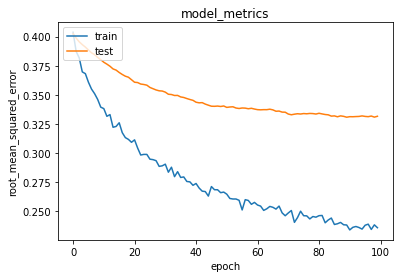

In [66]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Rekomendasi 